# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

### **IMPORT MODULES**

In [640]:
# Packages for data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **Players**

### **Title 1: Player Performance and Consistency Analysis (2020-2025)**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$

Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

**Analysis Focus:**
- Evaluate trends in Efficiency (EFF) over the past five years.
- Analyze how Games Played (GP), Age, Experience (EXP), and Minutes Played (MIN) correlate with EFF.
- Investigate whether performance declines as players get older (age-related performance changes).
- Identify players with high consistency in performance across seasons.


### **LOAD DATASETS**

In [641]:
nba_roster = pd.read_csv("final_data/nba_roster.csv")
nba_stats = pd.read_csv("final_data/player_stats.csv")

### **DATA UNDERSTANDING**

In `nba_roster.csv` has 9 columns where:

| Column Name | Description |
| --- | --- |
| player | The name of player |
| # | The player's jersey number | 
| pos | The player's position on the team | 
| height | The player's height |
| weight | The player's weight | 
|exp | The number of years the player has been in the NBA (experience) |
| how_acquired | How the player joined the team, such as through a trade, draft, free agency, etc.|
| team | The name of the team the player plays for |
| season | The NBA season in which the player is part of the roster |

In `player_stats` has 29 columns where:

| Column Name | Description |
| --- | --- |
| season | The NBA season for the statistics |
| team | The team of player is playing for during that season |
| pos | The player's position |
| g | Games played by the player during the season |
| gs | Games started by the player during the season |
| mp | Minutes played per game |
| fg | Field goals made by the player |
| fga | Field goals attempted by the player |
| fg% | Field goal percentage (calculated as FG made / FG attempted) |
| 3p | Three-point field goals made by the player |
| 3pa | Three-point field goals attempted by the player |
| 3p% | Three-point field goal percentage (3P made / 3P attempted) |
| 2p | Two-point field goals made by the player |
| 2pa | Two-point field goals attempted by the player |
| 2p% | Two-point field goal percentage (2P made / 2P attempted) |
| efg% | Effective field goal percentage, which gives more weight to three-point shots (calculated as (FG made + 0.5 * 3P made) / FG attempted) |
| ft | Free throws made by the player |
| fta | Free throws attempted by the player |
| ft% | Free throw percentage (FT made / FT attempted) | 
| orb | Offensive rebounds grabbed by the player |
| drb | Defensive rebounds grabbed by the player |
| trb | Total rebounds grabbed by the player (offensive + defensive rebounds) |
| ast | Assists made by the player |
| stl | Steals made by the player |
| blk | Blocks made by the player |
| tov | Turnovers committed by the player |
| pf | Personal fouls committed by the player |
| pts | Points scored by the player |
| name | The player's name |

### **CLEAN DATA**

In [642]:
nba_roster = nba_roster[['player', 'height', 'weight', 'exp', 'age', 'team', 'season']]

nba_roster = nba_roster.rename(columns={'player': 'name'})

In [643]:
nba_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2577 non-null   object
 1   height  2577 non-null   int64 
 2   weight  2577 non-null   object
 3   exp     2577 non-null   object
 4   age     2577 non-null   int64 
 5   team    2577 non-null   object
 6   season  2577 non-null   object
dtypes: int64(2), object(5)
memory usage: 141.1+ KB


The exp (experience) column is expected to be numerical because it represents the number of years a player has played in the NBA. However, based on the information above, it appears to be a categorical value so we need to investigate what caused this problem.

In [644]:
nba_roster["exp"].unique()

array(['7', '15', '8', '4', '1', '2', 'R', '3', '17', '6', '14', '16',
       '5', '13', '9', '12', '10', '11', '18', '19', '21', '20'],
      dtype=object)

We need to identify all records that contain the **R** value in the **exp** column.

In [645]:
nba_roster[nba_roster["exp"] == "R"]

,name,height,weight,exp,age,team,season
10,Anton Watson,80,225,R,24,Boston Celtics,2024-2025
15,Baylor Scheierman,78,205,R,24,Boston Celtics,2024-2025
24,Drew Peterson,81,205,R,24,Boston Celtics,2023-2024
27,Jordan Walsh,78,205,R,20,Boston Celtics,2023-2024
41,JD Davison,73,195,R,20,Boston Celtics,2022-2023
...,...,...,...,...,...,...,...
2548,Joe Wieskamp,78,205,R,22,San Antonio Spurs,2021-2022
2550,DJ Stewart,77,205,R,22,San Antonio Spurs,2021-2022
2558,Jock Landale,83,255,R,26,San Antonio Spurs,2021-2022
2571,Devin Vassell,77,200,R,20,San Antonio Spurs,2020-2021


Now, we pick a random player from the list (for example, **JD Davison**) to view all of his records.

In [646]:
nba_roster[nba_roster["name"] == "JD Davison"]

,name,height,weight,exp,age,team,season
7,JD Davison,73,195,2,22,Boston Celtics,2024-2025
25,JD Davison,73,195,1,21,Boston Celtics,2023-2024
41,JD Davison,73,195,R,20,Boston Celtics,2022-2023


We can observe that **JD Davison**'s experience (**exp**) increases with each season from 2022 to 2025. In the 2024-2025 season, he has 2 years of experience, and in the 2023-2024 season, he has 1 year of experience.

From this, we can conclude that the R value in the exp column indicates that the player has no experience (or is a Rookie) and we will not collect the Rookie in 2024-2025 (currently).

In [647]:
# Filter out rows where 'exp' is 'R' and 'season' is not '2024-25'
nba_roster = nba_roster[(nba_roster["exp"] != "R") & (nba_roster["season"] != "2024-25")]

# Convert the 'exp' column to numeric
nba_roster["exp"] = pd.to_numeric(nba_roster["exp"])

In [648]:
nba_roster.duplicated().sum()

0

In [649]:
nba_roster.describe()

,height,exp,age
count,2141.000000,2141.000000,2141.000000
mean,78.455862,5.187296,26.872489
std,3.248370,3.945771,4.182640
min,68.000000,1.000000,20.000000
25%,76.000000,2.000000,24.000000
50%,78.000000,4.000000,26.000000
75%,81.000000,7.000000,30.000000
max,89.000000,21.000000,43.000000


---------------

In [650]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  5047 non-null   object 
 1   team    5047 non-null   object 
 2   pos     5047 non-null   object 
 3   g       5047 non-null   float64
 4   gs      5047 non-null   float64
 5   mp      5047 non-null   float64
 6   fg      5047 non-null   float64
 7   fga     5047 non-null   float64
 8   fg%     5020 non-null   float64
 9   3p      5047 non-null   float64
 10  3pa     5047 non-null   float64
 11  3p%     4809 non-null   float64
 12  2p      5047 non-null   float64
 13  2pa     5043 non-null   float64
 14  2p%     4987 non-null   float64
 15  efg%    5024 non-null   float64
 16  ft      5047 non-null   float64
 17  fta     5042 non-null   float64
 18  ft%     4833 non-null   float64
 19  orb     5047 non-null   float64
 20  drb     5047 non-null   float64
 21  trb     5047 non-null   float64
 22  

In [651]:
nba_stats.duplicated().sum()

0

In [652]:
nba_stats.describe()

,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5020.000000,5047.000000,5047.000000,4809.000000,5047.000000,...,4833.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5030.000000
mean,43.476323,22.551813,1041.919358,179.027541,384.619576,0.451888,48.812760,135.732713,0.789565,130.467406,...,1.184128,45.244502,145.549435,189.227660,107.870220,34.029324,21.477908,59.829602,85.344363,487.322863
std,25.330049,26.596194,832.979893,173.514357,366.102631,0.109447,56.588189,148.829977,8.122078,138.876728,...,8.069001,53.510902,140.092373,185.816218,130.434168,31.908614,27.501729,60.776133,67.218598,481.299443
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,295.500000,38.000000,87.000000,0.407000,4.000000,14.000000,0.282000,23.000000,...,0.684000,10.000000,36.000000,47.000000,19.000000,8.000000,4.000000,13.000000,27.000000,101.000000
50%,45.000000,9.000000,864.000000,125.000000,270.000000,0.447000,28.000000,85.000000,0.341000,84.000000,...,0.772000,28.000000,108.000000,139.000000,63.000000,26.000000,12.000000,42.000000,73.000000,337.000000
75%,67.000000,41.000000,1727.000000,270.000000,581.000000,0.500000,76.500000,214.500000,0.384000,193.500000,...,0.840000,60.000000,215.000000,276.500000,142.500000,51.000000,28.000000,87.000000,134.000000,733.750000
max,84.000000,83.000000,3388.000000,875.000000,1941.000000,1.000000,402.000000,1028.000000,261.000000,803.000000,...,295.000000,440.000000,848.000000,1247.000000,925.000000,217.000000,254.000000,464.000000,610.000000,2818.000000


In [653]:
merged_data = pd.merge(
    nba_stats,
    nba_roster,
    how="inner",
    left_on=["name", "team", "season"],
    right_on=["name", "team", "season"],
)

merged_data.isnull().sum()

season     0
team       0
pos        0
g          0
gs         0
mp         0
fg         0
fga        0
fg%        5
3p         0
3pa        0
3p%       56
2p         0
2pa        1
2p%       16
efg%       4
ft         0
fta        1
ft%       58
orb        0
drb        0
trb        0
ast        0
stl        0
blk        0
tov        0
pf         0
pts        0
name       0
height     0
weight     0
exp        0
age        0
dtype: int64

In [654]:
null_records = merged_data[merged_data.isnull().any(axis=1)]

null_records

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,stl,blk,tov,pf,pts,name,height,weight,exp,age
7,2024-2025,Houston Rockets,C,18.0,0.0,186.0,17.0,28.0,0.607,0.0,...,5.0,4.0,21.0,19.0,44.0,Steven Adams,83,265,10,31
61,2021-2022,New York Knicks,PG,10.0,0.0,76.0,6.0,12.0,0.500,4.0,...,1.0,0.0,3.0,5.0,16.0,Ryan Arcidiacono,75,195,4,28
118,2024-2025,San Antonio Spurs,C,20.0,0.0,219.0,43.0,75.0,0.573,0.0,...,7.0,22.0,15.0,27.0,99.0,Charles Bassey,82,230,3,24
145,2020-2021,Golden State Warriors,C,1.0,0.0,15.0,0.0,2.0,0.000,0.0,...,0.0,2.0,1.0,2.0,1.0,Jordan Bell,80,216,3,26
162,2021-2022,Phoenix Suns,C,36.0,3.0,506.0,86.0,145.0,0.593,0.0,...,12.0,26.0,25.0,70.0,210.0,Bismack Biyombo,80,255,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,2022-2023,Cleveland Cavaliers,SF,3.0,0.0,10.0,2.0,3.0,0.667,1.0,...,1.0,0.0,1.0,0.0,5.0,Dylan Windler,79,196,2,26
1793,2023-2024,Atlanta Hawks,SF,6.0,0.0,73.0,10.0,19.0,0.526,8.0,...,2.0,0.0,2.0,3.0,28.0,Dylan Windler,79,196,3,27
1828,2021-2022,La Clippers,C,76.0,76.0,1852.0,310.0,495.0,0.626,0.0,...,36.0,77.0,114.0,203.0,785.0,Ivica Zubac,84,240,5,25
1830,2023-2024,La Clippers,C,68.0,68.0,1794.0,337.0,519.0,0.649,0.0,...,22.0,83.0,79.0,180.0,794.0,Ivica Zubac,84,240,7,27


In [655]:
for col in merged_data.columns:
    if merged_data[col].isnull().any():  
        merged_data[col] = merged_data.groupby('pos')[col].transform(lambda x: x.fillna(x.mean()))

merged_data.isnull().sum()

season    0
team      0
pos       0
g         0
gs        0
mp        0
fg        0
fga       0
fg%       0
3p        0
3pa       0
3p%       0
2p        0
2pa       0
2p%       0
efg%      0
ft        0
fta       0
ft%       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
name      0
height    0
weight    0
exp       0
age       0
dtype: int64

In [656]:
merged_data.head(10)

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,stl,blk,tov,pf,pts,name,height,weight,exp,age
0,2021-2022,Toronto Raptors,C,73.0,28.0,1725.0,265.0,603.0,0.439,56.0,...,37.0,41.0,84.0,151.0,664.0,Precious Achiuwa,80,225,1,22
1,2022-2023,Toronto Raptors,C,55.0,12.0,1140.0,196.0,404.0,0.485,29.0,...,31.0,30.0,59.0,102.0,508.0,Precious Achiuwa,80,225,2,23
2,2023-2024,New York Knicks,PF,49.0,18.0,1187.0,157.0,299.0,0.525,13.0,...,30.0,56.0,54.0,103.0,372.0,Precious Achiuwa,80,243,3,24
3,2024-2025,New York Knicks,PF,10.0,1.0,195.0,21.0,46.0,0.457,3.0,...,8.0,9.0,10.0,14.0,52.0,Precious Achiuwa,80,243,4,25
4,2020-2021,New Orleans Pelicans,C,58.0,58.0,1605.0,189.0,308.0,0.614,0.0,...,54.0,38.0,78.0,113.0,438.0,Steven Adams,83,265,7,27
5,2021-2022,Memphis Grizzlies,C,76.0,75.0,1999.0,210.0,384.0,0.547,0.0,...,65.0,60.0,115.0,153.0,528.0,Steven Adams,83,265,8,28
6,2022-2023,Memphis Grizzlies,C,42.0,42.0,1133.0,157.0,263.0,0.597,0.0,...,36.0,46.0,79.0,98.0,361.0,Steven Adams,83,265,9,29
7,2024-2025,Houston Rockets,C,18.0,0.0,186.0,17.0,28.0,0.607,0.0,...,5.0,4.0,21.0,19.0,44.0,Steven Adams,83,265,10,31
8,2020-2021,Miami Heat,C,64.0,64.0,2143.0,456.0,800.0,0.570,2.0,...,75.0,66.0,169.0,145.0,1197.0,Bam Adebayo,81,255,3,23
9,2021-2022,Miami Heat,C,56.0,56.0,1825.0,406.0,729.0,0.557,0.0,...,80.0,44.0,148.0,171.0,1068.0,Bam Adebayo,81,255,4,24


### **GENERAL**

## **Evaluate trends in Efficiency (EFF) over the past five years**

**Objective 1 - Question 1: What is the information of eff of the NBA players though each season?**

In [657]:
merged_data['eff'] = (
    (merged_data['pts'] + merged_data['trb'] + merged_data['ast'] + merged_data['stl'] + merged_data['blk']) - 
    ((merged_data['fga'] - merged_data['fg']) + (merged_data['fta'] - merged_data['ft']) + merged_data['tov'])
) / merged_data['g']

merged_data = merged_data[merged_data['season'].isin([
    "2020-2021", "2021-2022", "2022-2023", "2023-2024", "2024-2025"
])]

season_group = merged_data.groupby(by='season')

for year, group in season_group:
    desc = group['eff'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-2021  Count: 315    25%: 8.01     Mean: 12.75    75%: 16.46    Std: 6.99     Min: -0.06    Max: 35.90   
2021-2022  Count: 336    25%: 7.58     Mean: 12.28    75%: 16.22    Std: 6.85     Min: -1.00    Max: 38.68   
2022-2023  Count: 373    25%: 6.83     Mean: 12.16    75%: 16.68    Std: 7.09     Min: 0.29     Max: 38.00   
2023-2024  Count: 404    25%: 5.54     Mean: 11.55    75%: 16.54    Std: 7.47     Min: -0.14    Max: 38.47   
2024-2025  Count: 404    25%: 5.12     Mean: 11.11    75%: 15.81    Std: 7.73     Min: -26.63   Max: 41.42   


### **INSIGHTS**
- The decrease in average efficiency (eff) of players over the past five seasons (from 12.75 in 2020-2021 to 11.11 in 2024-2025). With a slight overall decline in player efficiency across the league, it suggests that the overall performance of players on average has less efficient in recent years which could be due to various factors such as changes in playing styles, team strategies, or player roles.

- The efficiency of the lowest 25% of players has consistently decreased over time (from 8.01 in 2020-2021 to 5.12 in 2024-2025). This indicates that the performance gap between the less efficient players has become smaller, with the bottom-performing players having lower efficiency scores in recent years. Besides that, the efficiency of the top 25% of players has also gradually decreased (from 16.46 in 2020-2021 to 15.81 in 2024-2025), reflecting a potential shift in player performance or distribution.

- About the range of efficiency, the minimum efficiency has varied widely across seasons, from a low of -0.06 in 2020-2021 to -26.63 in 2024-2025. This represents a few extreme outliers where certain players had very poor performances, with the most negative values occurring in 2024-2025 and the maximum efficiency has ranged from 35.90 in 2020-2021 to 41.42 in 2024-2025 and this increase in the maximum efficiency over time suggests that some exceptional players continue to push the limits of individual performance, achieving higher efficiency scores in more recent seasons.

- The standard deviation has steadily increased over the years, from 6.99 in 2020-2021 to 7.73 in 2024-2025 and it indicates a wider spread between top and bottom performers, with both outstanding performances and poor performances becoming more common.

=> This increasing variability could reflect changes in player roles, team dynamics, or more significant differences in individual performance from season to season.

## **Analyze how Age, Experience (EXP) correlate with EFF**


**Objective 1 - Question 2: What is the information of age of the NBA players though each season?**

In [659]:
for year, group in season_group:
    desc = group['age'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-2021  Count: 315    25%: 23.00    Mean: 26.14    75%: 28.00    Std: 3.51     Min: 20.00    Max: 36.00   
2021-2022  Count: 336    25%: 24.00    Mean: 26.50    75%: 29.00    Std: 3.82     Min: 20.00    Max: 37.00   
2022-2023  Count: 373    25%: 24.00    Mean: 26.73    75%: 30.00    Std: 4.02     Min: 20.00    Max: 38.00   
2023-2024  Count: 404    25%: 24.00    Mean: 26.84    75%: 29.00    Std: 4.19     Min: 20.00    Max: 39.00   
2024-2025  Count: 404    25%: 23.00    Mean: 26.42    75%: 29.00    Std: 4.25     Min: 20.00    Max: 39.00   


### **INSIGHTS**

- Consistent mean age (26 - 27 years old) when the average age of NBA players has remained fairly stable over teh past five seasons (just fluctuating between 26.14 and 26.84). This suggests that the NBA continues to have a relatively young pool of players, with most players being in their mid-20s to early 30s.

- About the age distribution, 25% of players are 23 or younger, indicating a strong influx of young talent into the league and 75% of players are under 29 to 30 years old, showing a relatively youthful age distribution in the NBA.

- 20 years old, which is the minimum age players can be drafted in the NBA, indicating that the league is still attracting very young players and the maximum age has gradually increased, from 36 years old in 2020-2021 to 39 years old in 2024-2025.

    - This increase in the maximum age suggests a trend of greater player longevity, where experienced players are staying active in the league well into their late 30s. This could be attributed to advances in player care, including better medical treatments, fitness regimens, and nutrition.

**Objective 1 - Question 3: What is the information of exp of the NBA players though each season?**

In [660]:
for year, group in season_group:
    desc = group['exp'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-2021  Count: 315    25%: 2.00     Mean: 4.34     75%: 6.00     Std: 3.31     Min: 1.00     Max: 17.00   
2021-2022  Count: 336    25%: 2.00     Mean: 4.73     75%: 7.00     Std: 3.54     Min: 1.00     Max: 18.00   
2022-2023  Count: 373    25%: 2.00     Mean: 4.95     75%: 7.00     Std: 3.76     Min: 1.00     Max: 19.00   
2023-2024  Count: 404    25%: 2.00     Mean: 5.09     75%: 7.00     Std: 3.88     Min: 1.00     Max: 20.00   
2024-2025  Count: 404    25%: 2.00     Mean: 5.26     75%: 7.00     Std: 4.00     Min: 1.00     Max: 21.00   


### **INSIGHTS**

- Increase in Average Experience (EXP) shows in The mean experience of players has been gradually increasing, from 4.34 in 2020-2021 to 5.26 in 2024-2025. This indicates that, on average, NBA players are gaining more years of experience as the seasons progress. Besides that, this increase suggests that veteran players are staying in the league longer, contributing to a higher overall level of experience in the NBA.

- Consistent in lower and upper quartiles, 25% of players has remained at 2 years across all seasons. This suggests that many players are relatively new to the NBA (with 25% having 2 or fewer years of experience). And 75% of players is between 6 and 7 years across all seasons, meaning that 75% of players have 6 to 7 years of experience or fewer. This indicates a strong mix of both experienced and relatively new players in the league

- The maximum experience has been gradually increasing from 17 years in 2020-2021 to 21 years in 2024-2025. This increase suggests that some veteran players are maintaining long careers in the league, likely due to advances in fitness, medical care, and recovery.

- The standard deviation has been gradually increasing, from 3.31 in 2020-2021 to 4.00 in 2024-2025. This indicates a growing variation in experience levels, with an increasing number of players having significantly different levels of experience within each season. More players with very low or very high experience may be entering the league, leading to a broader range of experience.

- Over the past five years, the range of experience (from 1 year to 21 years) has widened. This could be due to a combination of factors, such as an influx of young players entering the league and the longevity of some veteran players. Teams are likely balancing between developing young talent and maintaining experienced players for leadership and performance.


**Objective 1 - Question 4: What is the correlation between eff, age and exp in all dataset?**

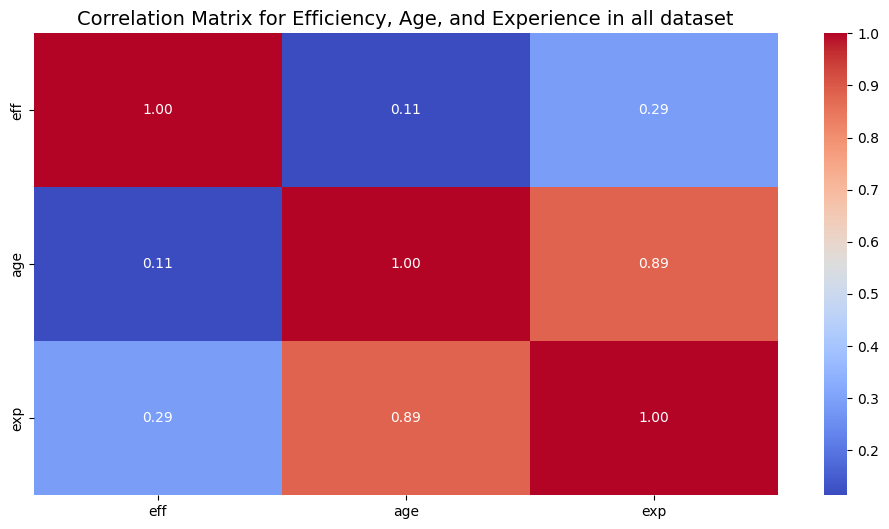

In [661]:
correlation_data = merged_data[["eff", "age", "exp"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Matrix for Efficiency, Age, and Experience in all dataset", fontsize=14)
plt.show()

### **INSIGHTS**

- The correlation between **efficiency (eff)** and **age** is **0.11**, which is a weak positive correlation. This indicates that age has very little impact on player efficiency, showing that players of any age can achieve high levels of efficiency.
- Comparing **efficiency (eff)** and **experience (exp)** reveals a correlation of **0.29**, which is a moderate positive relationship. This suggests that experience has a stronger influence on efficiency than age, implying that veteran players are generally more efficient than less experienced ones.

## **Investigate whether efficiency declines as players get older (age-related and exp-related performance changes)**


**Objective 1 - Question 5: What is the trend of age and eff in all dataset?**

In [662]:
bins_age = [20, 25, 30, 35, 40]  
labels_age = ['20-25', '26-30', '31-35', '36+']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins_age, labels=labels_age, right=False)

age_group_stats = merged_data.groupby('age_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

age_group_stats

,age_group,eff
0,20-25,10.903953
1,26-30,12.241092
2,31-35,13.225541
3,36+,11.801511


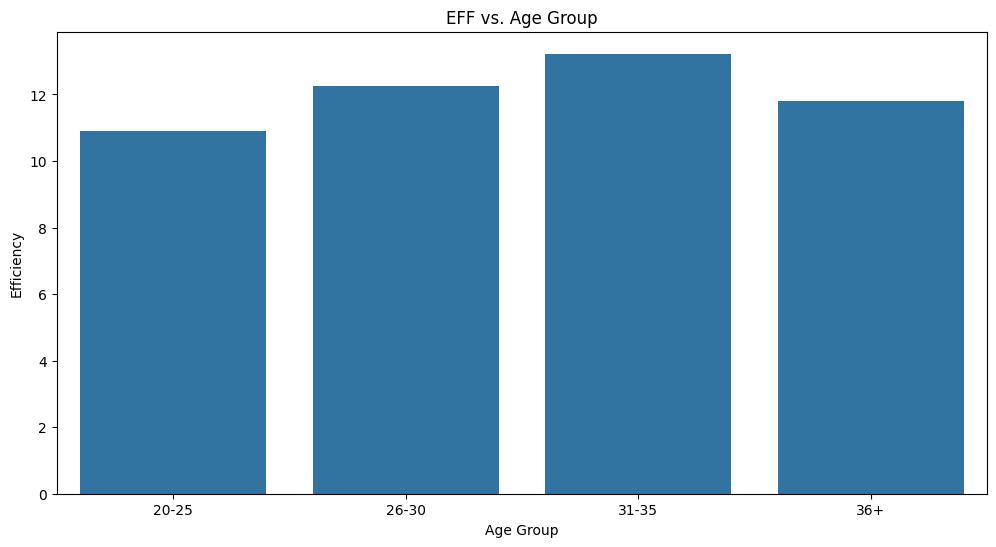

In [663]:
plt.figure(figsize=(12, 6)) 

sns.barplot(data=age_group_stats, x='age_group', y='eff')  
plt.title("EFF vs. Age Group") 
plt.xlabel('Age Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO AGE-RELATED PERFORMANCE CHANGES**
### **AGE GROUP EFFICIENCY TRENDS**
- Players aged 20–25 have the lowest average efficiency (10.90). This may indicate that younger players are still developing their skills and adapting to high-level competition.
- Efficiency peaks in the 31–35 age group (13.23), suggesting this age bracket is the optimal performance period, likely due to a combination of physical prime and accumulated experience.
- Players aged 36+ show a more noticeable decline (11.80). This is likely due to physical aging, even though experience might still contribute positively.
### **CONCLUSION**
- There is a clear progression where efficiency increases from the youngest group to the 31–35 group, emphasizing the benefit of skill refinement and shaper.
- The gradual decline in efficiency after age 35 highlights the balance between retaining skill and managing physical aging.
- The efficiency of older players (36+) still remains relatively competitive, potentially due to their ability to compensate for physical decline with tactical awareness and experience.

**Objective 1 - Question 6: What is the trend of eff and exp in all dataset?**

In [664]:
bins_exp = [0, 5, 10, 15, 20, 25]  
labels_exp = ['0-5', '6-10', '11-15', '16-20', '21+']
merged_data['exp_group'] = pd.cut(merged_data['exp'], bins=bins_exp, labels=labels_exp, right=False)

exp_group_stats = merged_data.groupby('exp_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

exp_group_stats

,exp_group,eff
0,0-5,10.014321
1,6-10,14.470415
2,11-15,13.892116
3,16-20,14.755002
4,21+,28.828974


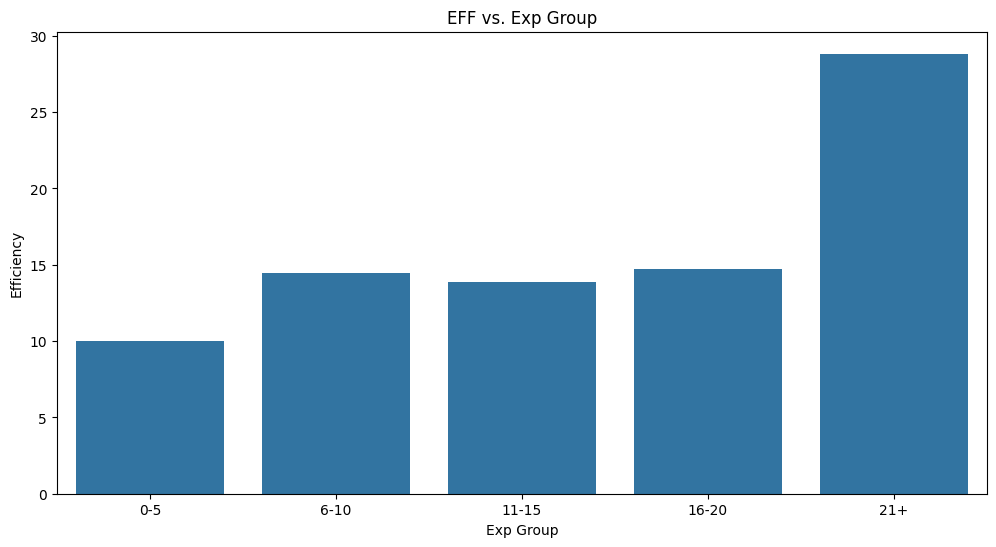

In [665]:
plt.figure(figsize=(12, 6))  

sns.barplot(data=exp_group_stats, x='exp_group', y='eff')
plt.title("EFF vs. Exp Group")  
plt.xlabel('Exp Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO EXPERIENCE-RELATED PERFORMANCE CHANGES**
### **EXPERIENCE GROUP EFFICIENCY TRENDS**
- Players with 0–5 years of experience have the lowest average efficiency (10.01). This is likely because newer players are still developing their skills, understanding game dynamics, and adapting to professional levels of competition.
- Efficiency significantly improves in the 6–10 years group (14.47), indicating that players start to reach a mature understanding of the game and have developed their technical skills.
- Players with 21+ years of experience exhibit an extraordinary efficiency score (28.82), which is significantly higher than all other groups. This could be due to their expertise, leadership roles, or specialization in key tasks that maximize their contributions.
### **CONCLUSION**
- Efficiency steadily increases from the least experienced group (0–5 years) to the 6–10 years group, reflecting the critical role of experience in developing performance.
- The sharp rise in efficiency for players with 21+ years of experience suggests that this group is either an outlier or contains a select group of players whose roles or contributions are highly specialized.

## **Identify players with high consistency in performance across seasons**

**Objective 1 - Question 7: What is the change in efficiency of each player though each season?**

In [666]:
player_season_data = merged_data.groupby(['name', 'season']).agg({'eff': 'mean'}).reset_index()

player_season_data['eff_change'] = player_season_data.groupby('name')['eff'].diff()

player_season_data

,name,season,eff,eff_change
0,A.J. Lawson,2023-2024,3.095238,NaN
1,A.J. Lawson,2024-2025,4.500000,1.404762
2,AJ Griffin,2023-2024,1.100000,NaN
3,Aaron Gordon,2020-2021,12.520000,NaN
4,Aaron Gordon,2021-2022,16.653333,4.133333
...,...,...,...,...
1827,Ziaire Williams,2024-2025,9.571429,1.473389
1828,Zion Williamson,2020-2021,27.540984,NaN
1829,Zion Williamson,2022-2023,27.000000,-0.540984
1830,Zion Williamson,2023-2024,23.900000,-3.100000


The players have an **eff_change value** of **NaN** because they have only played one season, so there is no previous data for comparison. We will remove them from the dataset.

In [667]:
player_season_data_grouped = player_season_data.groupby(by='name')

filtered_data = player_season_data_grouped.filter(lambda x: len(x) > 1)
filtered_data = filtered_data.reset_index().drop(columns='index')

filtered_data.head()

,name,season,eff,eff_change
0,A.J. Lawson,2023-2024,3.095238,NaN
1,A.J. Lawson,2024-2025,4.500000,1.404762
2,Aaron Gordon,2020-2021,12.520000,NaN
3,Aaron Gordon,2021-2022,16.653333,4.133333
4,Aaron Gordon,2022-2023,19.264706,2.611373


After removing players who have only played one season, the dataset still contains **eff_change** values of **NaN** because it is their first season in the NBA, and there is no previous data for comparison. We will replace these NaN values with **0**.

In [668]:
filtered_data['eff_change'] = filtered_data['eff_change'].replace(np.nan, 0)

filtered_data.head()

,name,season,eff,eff_change
0,A.J. Lawson,2023-2024,3.095238,0.000000
1,A.J. Lawson,2024-2025,4.500000,1.404762
2,Aaron Gordon,2020-2021,12.520000,0.000000
3,Aaron Gordon,2021-2022,16.653333,4.133333
4,Aaron Gordon,2022-2023,19.264706,2.611373


**Objective 1 - Question 8: Calculate the standard deviation of the efficiency change for each player**


In [669]:
player_std_data = (filtered_data.groupby('name')['eff_change']
                   .std()
                   .reset_index()
                   .replace(np.nan, 0))

player_std_data.rename(columns={'eff_change': 'eff_std'}, inplace=True)

player_std_data

,name,eff_std
0,A.J. Lawson,0.993317
1,Aaron Gordon,2.480917
2,Aaron Holiday,2.980956
3,Aaron Nesmith,3.924038
4,Aaron Wiggins,0.298157
...,...,...
458,Zach Collins,3.606957
459,Zach LaVine,2.161761
460,Zeke Nnaji,1.567625
461,Ziaire Williams,1.481459


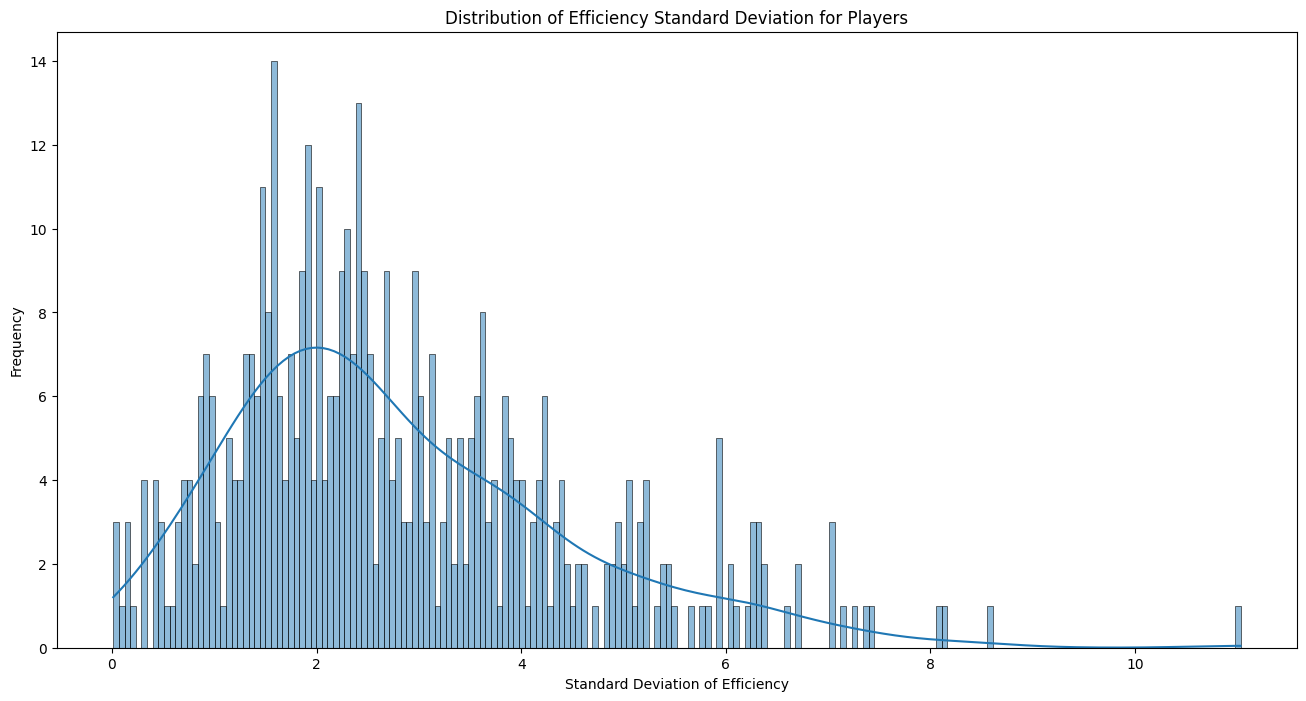

In [670]:
# Plot the histogram
plt.figure(figsize=(16, 8))

sns.histplot(data=player_std_data, x='eff_std', bins=200, kde=True)
plt.title('Distribution of Efficiency Standard Deviation for Players')
plt.xlabel('Standard Deviation of Efficiency')
plt.ylabel('Frequency')

plt.show()

**Objective 1 - Question 9: Identify players with high consistency (low standard deviation) in performance across seasons**


In [671]:
# Filter for players with low standard deviation (high consistency)
mean = player_std_data['eff_std'].mean()
std_dev = player_std_data['eff_std'].std()
threshold = mean - std_dev

high_consistency_players = player_std_data[player_std_data['eff_std'] < threshold]

high_consistency_players = high_consistency_players.sort_values(by='eff_std', ascending=True).reset_index().drop(columns='index')

high_consistency_players

,name,eff_std
0,Devontae Cacok,0.012740
1,Dalen Terry,0.059496
2,Johnny Juzang,0.063640
3,Moses Brown,0.082842
4,Ousmane Dieng,0.157555
5,Nikola Jović,0.157764
6,Rodney McGruder,0.162925
7,Mark Williams,0.229117
8,Aaron Wiggins,0.298157
9,Kira Lewis Jr.,0.302379
